# **I. Import all the necessary libraries**

In [ ]:
from utils import *
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# **II. Import and Preprocess the dataset**

In [2]:
data = pd.read_csv('Student_Performance.csv')


In [3]:
train, test = train_test_split(data)


In [4]:
x_test = test[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_test = test['Performance Index']


In [5]:
x_train = train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_train = train['Performance Index']


In [6]:
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Columns to normalize: All except for extracurricular activities

In [7]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


In [8]:
x_meta = [x_test,x_train]


In [ ]:
x_meta = [x_test,x_train]
y_meta = [y_test,y_train]
for i in features:
    for j in x_meta:
        if i == 'Extracurricular Activities':
            dict_map = {
                'Yes' : 1,
                'No' : 0,
            }
            j['Extracurricular Activities'] = j['Extracurricular Activities'].map(dict_map)
        else:
            j[i] = z_score_normalize(j[i])
del x_meta,y_meta


In [10]:
x_train


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2125,0.375,0.966102,0,0.6,0.777778
7445,0.250,0.813559,1,0.6,0.888889
5544,0.375,0.610169,0,0.6,1.000000
4754,0.750,0.661017,0,0.2,0.888889
7595,0.875,0.813559,0,0.6,0.222222
...,...,...,...,...,...
6504,0.375,0.322034,0,0.0,0.666667
9089,1.000,0.661017,0,0.4,0.555556
4728,0.375,0.355932,0,0.2,0.333333
8801,0.125,0.338983,1,0.0,0.666667


In [ ]:
y_train


# **III. Train the model**

In [12]:
model = LinearRegression()


In [ ]:
model.batch_gradient_descent_train(x_train,y_train,epochs=1000,eta=0.3)


Training MSE Loss:  263.5296839242785
Training MSE Loss:  3.3539032707423786
Training MSE Loss:  2.1517252188876608
Training MSE Loss:  2.0985775052500246
Training MSE Loss:  2.095579639465741
Training MSE Loss:  2.095407674767211
Training MSE Loss:  2.0953978003324227
Training MSE Loss:  2.095397233294181
Training MSE Loss:  2.0953972007319535
Training MSE Loss:  2.0953971988620634
Final training MSE Loss:  2.0953971987548745


In [14]:
print(model.w,model.b)


[[22.82125459]
 [60.03772624]
 [ 0.60747132]
 [ 2.33275195]
 [ 1.69640921]] 11.53514425253582


In [15]:
print(model.predict(x_test.iloc[0].to_numpy()),y_test.iloc[0])


[33.3341937] 32.0


In [16]:
prediction = []
for i in range(x_test.shape[0]):
    prediction.append(model.predict(x_test.iloc[i].to_numpy()))


# **IV. Evaluation**

In [17]:
calculate_mae(prediction,y_test)


1.5809890172056817

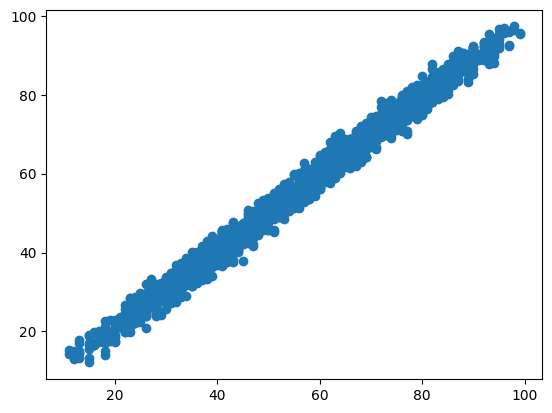

In [18]:
plt.scatter(y_test,prediction)
